In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/processed_data.csv')

In [3]:
data.head()

,Date,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
0,2025-03-14,315.493,9871.433801,330.159478,9884.680244,9709.470078,165.49,31995890,211.250,166.4900,162.45,213.9500,60107580,211.250,213.9500,209.58
1,2025-03-13,315.493,9541.274322,-169.153609,9716.739851,9476.858596,162.76,31756210,215.950,166.1300,162.11,216.8394,61368330,215.950,216.8394,208.42
2,2025-03-12,315.493,9710.427932,126.454775,9841.303834,9611.226680,167.11,28372400,220.140,167.6399,163.53,221.7500,62547470,220.140,221.7500,214.91
3,2025-03-11,315.493,9583.973157,35.421132,9740.399484,9449.367405,164.04,39587410,223.805,166.7500,161.37,225.8399,76137410,223.805,225.8399,217.45
4,2025-03-10,315.493,9548.552025,-495.741338,9815.136880,9448.979167,165.87,43604030,235.540,168.4600,163.69,236.1600,72071200,235.540,236.1600,224.22


### Testing partial autocorrelation:

"this will help you choose the value of the parameter p in the ARIMA model: p=N where N is the largest statistically significant lag in the partial autocorrelation"

Commenting this part out for less output in Kaggle for now

In [4]:
colNames = data.columns
print(colNames)

Index(['Date', 'CPI', 'IndexValue_NDXT', 'NetChange_NDXT', 'High_NDXT',
       'Low_NDXT', 'Close/Last_GOOGL', 'Volume_GOOGL', 'Open_GOOGL',
       'High_GOOGL', 'Low_GOOGL', 'Close/Last_AAPL', 'Volume_AAPL',
       'Open_AAPL', 'High_AAPL', 'Low_AAPL'],
      dtype='object')


In [5]:
# partial autocorrelation plot
# maxlist=[]
"""
for i in range(1, len(data.columns)):
  sm.graphics.tsa.plot_pacf(data[colNames[i]], lags=20);
  plt.title(colNames[i])
  plt.xlabel('Lag')
  plt.ylabel('Partial Autocorrelation')
  plt.show()
"""

"\nfor i in range(1, len(data.columns)):\n  sm.graphics.tsa.plot_pacf(data[colNames[i]], lags=20);\n  plt.title(colNames[i])\n  plt.xlabel('Lag')\n  plt.ylabel('Partial Autocorrelation')\n  plt.show()\n"

### Testing for Stationarity:
"this will allow you to choose the parameter i in the ARIMA model: i=0 for stationary time series, i=1 for non stationary time series"

In [6]:
dataNew = data.drop(['Date'], axis=1)
dataNew.head()

,CPI,IndexValue_NDXT,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Volume_GOOGL,Open_GOOGL,High_GOOGL,Low_GOOGL,Close/Last_AAPL,Volume_AAPL,Open_AAPL,High_AAPL,Low_AAPL
0,315.493,9871.433801,330.159478,9884.680244,9709.470078,165.49,31995890,211.250,166.4900,162.45,213.9500,60107580,211.250,213.9500,209.58
1,315.493,9541.274322,-169.153609,9716.739851,9476.858596,162.76,31756210,215.950,166.1300,162.11,216.8394,61368330,215.950,216.8394,208.42
2,315.493,9710.427932,126.454775,9841.303834,9611.226680,167.11,28372400,220.140,167.6399,163.53,221.7500,62547470,220.140,221.7500,214.91
3,315.493,9583.973157,35.421132,9740.399484,9449.367405,164.04,39587410,223.805,166.7500,161.37,225.8399,76137410,223.805,225.8399,217.45
4,315.493,9548.552025,-495.741338,9815.136880,9448.979167,165.87,43604030,235.540,168.4600,163.69,236.1600,72071200,235.540,236.1600,224.22


In [7]:
significance_threshold = 0.05
stationary_list=[] #0 is false 1 is true
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in dataNew.columns:
  unittest = sm.tsa.stattools.adfuller(dataNew[c])
  print(c, unittest) # use the ADfuller test that we tried in class - that notebook is here  https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb
  print(f"statistics value: {unittest[0]}")
  print(f"p-value: {unittest[1]}")
  print(f"is p-value < {significance_threshold}? {unittest[1]<significance_threshold}")
  print(f"\nis there a unit test? {unittest[1]>=significance_threshold}")
  print(f"\nis it stationary? {unittest[1]<significance_threshold}")
  if unittest[1]<significance_threshold:
    stationary_list.append(1)
  else:
    stationary_list.append(0)

stationary_list

Stationarity results from the AD Fuller test at a p-value of 0.05
CPI (-1.6370564356587025, 0.46379930116547535, 1, 2514, {'1%': -3.4329538144697187, '5%': -2.8626903542179405, '10%': -2.567382377622466}, -16602.21770918603)
statistics value: -1.6370564356587025
p-value: 0.46379930116547535
is p-value < 0.05? False

is there a unit test? True

is it stationary? False
IndexValue_NDXT (-1.4381542733650723, 0.5638540490504418, 26, 2489, {'1%': -3.4329799947351503, '5%': -2.862701915447137, '10%': -2.5673885329713495}, 30349.65822155431)
statistics value: -1.4381542733650723
p-value: 0.5638540490504418
is p-value < 0.05? False

is there a unit test? True

is it stationary? False
NetChange_NDXT (-11.826218476212645, 8.191536072260741e-22, 25, 2490, {'1%': -3.4329789374204935, '5%': -2.8627014485379787, '10%': -2.5673882843825098}, 30347.97217192471)
statistics value: -11.826218476212645
p-value: 8.191536072260741e-22
is p-value < 0.05? True

is there a unit test? False

is it stationary? Tr

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]

Stationary: net change in NDXT, volume of Google, volume of Apple

### Getting ARIMA of all data:

Testing things out; commenting out to have less output while running Kaggle

In [8]:
"""
column_name = colNames[2]

aics = np.zeros((10,10))
for p in range(10):
    for q in range(10):
      try:
          mod = sm.tsa.ARIMA(data[column_name], order=(p,0,q))
          mod = mod.fit()
          print(mod)
          aics[p][q] = mod.aic

      except:
          aics[p][q] = np.nan

# print(aics)
# p,q = np.where(aics == np.nanmin(aics))
# print("best parameters: p: {:d} q: {:d}".format(p[0],q[0]))
"""

'\ncolumn_name = colNames[2]\n\naics = np.zeros((10,10))\nfor p in range(10):\n    for q in range(10):\n      try:\n          mod = sm.tsa.ARIMA(data[column_name], order=(p,0,q))\n          mod = mod.fit()\n          print(mod)\n          aics[p][q] = mod.aic\n\n      except:\n          aics[p][q] = np.nan\n\n# print(aics)\n# p,q = np.where(aics == np.nanmin(aics))\n# print("best parameters: p: {:d} q: {:d}".format(p[0],q[0]))\n'

In [9]:
"""
print(aics)
p,q = np.where(aics == np.nanmin(aics))
print("best parameters: p: {:d} q: {:d}".format(p[0],q[0]))
"""

'\nprint(aics)\np,q = np.where(aics == np.nanmin(aics))\nprint("best parameters: p: {:d} q: {:d}".format(p[0],q[0]))\n'

In [10]:
# test running things
"""
column_name = colNames[2]
N_test = 800
p = 6
i = stationary_list[2-1]
q = 5

print("information for " + str(column_name))
arima_model = sm.tsa.ARIMA(data.iloc[:-800][column_name], order=(p, i, q))
model_fit = arima_model.fit()
model_fit.summary()
"""

'\ncolumn_name = colNames[2]\nN_test = 800\np = 6\ni = stationary_list[2-1]\nq = 5\n\nprint("information for " + str(column_name))\narima_model = sm.tsa.ARIMA(data.iloc[:-800][column_name], order=(p, i, q))\nmodel_fit = arima_model.fit()\nmodel_fit.summary()\n'

In [11]:
"""
plt.plot(data.iloc[:].index, data.iloc[:][column_name])

forecast = model_fit.get_forecast(800)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int()


yhatArray = yhat.values
dataValues = data.iloc[-800:][column_name].values
residual = dataValues - yhatArray


# Plot the predictions with uncertainty
plt.plot(data.iloc[-800:].index, yhat, label="Predicted", color="red")
plt.fill_between(data.iloc[-800:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval", alpha=0.50)
plt.xticks(data.index[::30], rotation=75)

plt.xlim(0, len(data['Date']))

plt.xlabel("Time")
plt.ylabel(column_name)
plt.title("Prediction of the Last 800 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()
"""

'\nplt.plot(data.iloc[:].index, data.iloc[:][column_name])\n\nforecast = model_fit.get_forecast(800)\nyhat = forecast.predicted_mean\nyhat_conf_int = forecast.conf_int()\n\n\nyhatArray = yhat.values\ndataValues = data.iloc[-800:][column_name].values\nresidual = dataValues - yhatArray\n\n\n# Plot the predictions with uncertainty\nplt.plot(data.iloc[-800:].index, yhat, label="Predicted", color="red")\nplt.fill_between(data.iloc[-800:].index,  yhat_conf_int["lower " + column_name],\n                 yhat_conf_int["upper " + column_name],\n                 color="skyblue",\n                 label="95% Confidence Interval", alpha=0.50)\nplt.xticks(data.index[::30], rotation=75)\n\nplt.xlim(0, len(data[\'Date\']))\n\nplt.xlabel("Time")\nplt.ylabel(column_name)\nplt.title("Prediction of the Last 800 Steps with Uncertainty")\nplt.legend(fontsize=10)\nplt.show()\n'

### Actual Computing Code

Things we want to fit with ARIMA:


*   NDXT-100 Index Value
*   Volume of Google
*   Volume of Apple
*   CPI
*   High of Google
*   High of Apple


*   (Additional idea) Create additional data of high - low for Google and Apple?








In [12]:
def getPandQ(dataColumn, indOfQuant):
  iValue = stationary_list[indOfQuant-1]
  aics = np.zeros((20,10))
  for p in range(20):
      for q in range(10):
        try:
            mod = sm.tsa.ARIMA(dataColumn, order=(p,iValue,q))
            mod = mod.fit()
            # print(mod)
            aics[p][q] = mod.aic

        except:
            aics[p][q] = np.nan

  p,q = np.where(aics == np.nanmin(aics))
  return p[0], q[0]


In [13]:
def getARIMAPredict(indOfQuant):
  # no forecasting here (i.e. not like the HW we did)

  column_name = colNames[indOfQuant]

  p, q = getPandQ(data[column_name], indOfQuant)
  # p = 6 # for quick testing
  # q = 2 # for quick testing
  i = stationary_list[indOfQuant-1]

  print("information for " + str(column_name))
  arima_model = sm.tsa.ARIMA(data[column_name], order=(p, i, q))
  model_fit = arima_model.fit()
  print(model_fit.summary())

  prediction = model_fit.predict(start = 1, end=len(data[column_name]))

  plt.plot(data['Date'], data[column_name], label='data')
  plt.plot(data['Date'], prediction, ls = '--', color = 'tab:purple', label='prediction')
  plt.title(column_name)
  plt.xlabel('Date')
  plt.ylabel(column_name)
  plt.legend()
  plt.show()

  residual = data[column_name] - prediction

  plt.plot(data['Date'], residual[1:], label = 'residual')
  plt.title('Residual Plot')
  plt.xlabel('Date')
  plt.ylabel('Residual')
  plt.show()


  return prediction, residual

In [14]:
print(colNames)

Index(['Date', 'CPI', 'IndexValue_NDXT', 'NetChange_NDXT', 'High_NDXT',
       'Low_NDXT', 'Close/Last_GOOGL', 'Volume_GOOGL', 'Open_GOOGL',
       'High_GOOGL', 'Low_GOOGL', 'Close/Last_AAPL', 'Volume_AAPL',
       'Open_AAPL', 'High_AAPL', 'Low_AAPL'],
      dtype='object')


In [15]:
ind_NDXT = np.where(colNames == 'IndexValue_NDXT')[0][0]
ind_volGoog = np.where(colNames == 'Volume_GOOGL')[0][0]
ind_volApp = np.where(colNames == 'Volume_AAPL')[0][0]
ind_CPI = np.where(colNames == 'CPI')[0][0]
ind_highGoog = np.where(colNames == 'High_GOOGL')[0][0]
ind_highApp = np.where(colNames == 'High_AAPL')[0][0]

indInterestList = [ind_NDXT, ind_volGoog, ind_volApp, ind_CPI, ind_highGoog, ind_highApp]
headerList = ['IndexValue_NDXT', 'Volume_GOOGL', 'Volume_AAPL', 'CPI', 'High_GOOGL', 'High_AAPL']

print(indInterestList)

[2, 7, 12, 1, 9, 14]


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

information for IndexValue_NDXT


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:        IndexValue_NDXT   No. Observations:                 2516
Model:                ARIMA(14, 0, 5)   Log Likelihood              -15361.955
Date:                Fri, 02 May 2025   AIC                          30765.910
Time:                        19:11:58   BIC                          30888.349
Sample:                             0   HQIC                         30810.347
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5818.8086   4881.364      1.192      0.233   -3748.489    1.54e+04
ar.L1          0.7175      0.033     21.663      0.000       0.653       0.782
ar.L2          0.6231      0.051     12.279      0.0

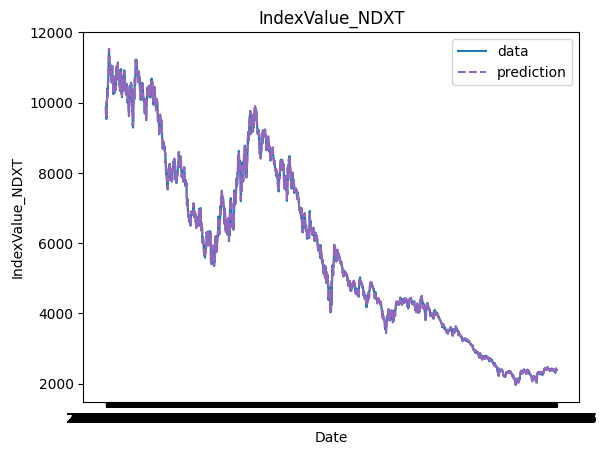

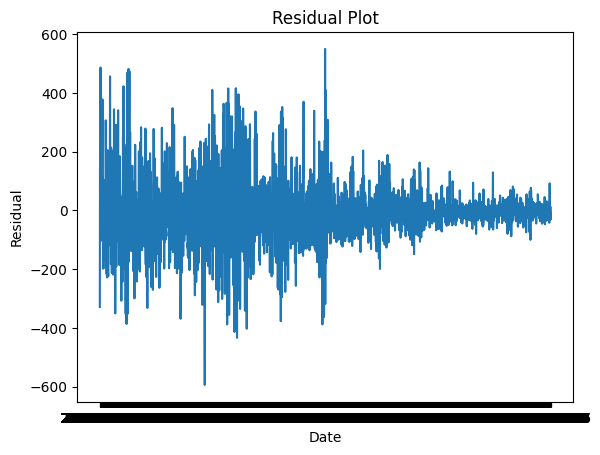

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

information for Volume_GOOGL


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Volume_GOOGL   No. Observations:                 2516
Model:                 ARIMA(8, 1, 9)   Log Likelihood              -44802.759
Date:                Fri, 02 May 2025   AIC                          89641.519
Time:                        20:10:31   BIC                          89746.459
Sample:                             0   HQIC                         89679.605
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7216      0.418     -1.726      0.084      -1.541       0.098
ar.L2         -0.6565      0.391     -1.681      0.093      -1.422       0.109
ar.L3         -0.2134      0.206     -1.038      0.2

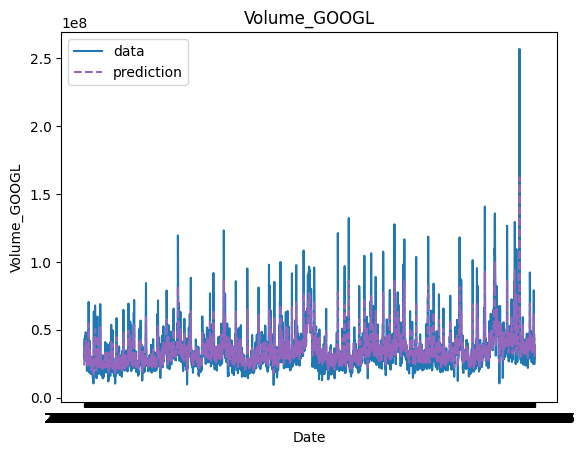

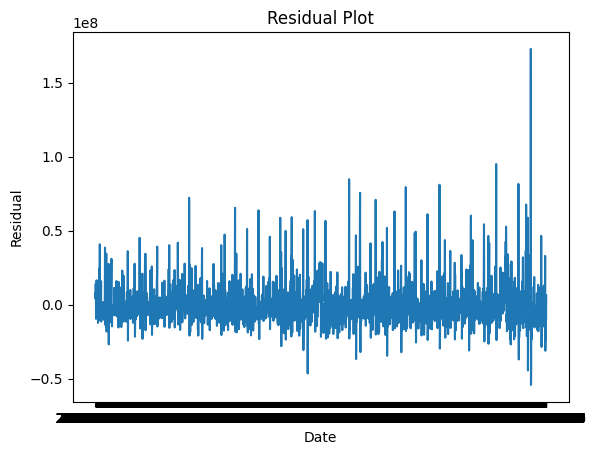

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py

information for Volume_AAPL


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            Volume_AAPL   No. Observations:                 2516
Model:                 ARIMA(9, 1, 1)   Log Likelihood              -47619.328
Date:                Fri, 02 May 2025   AIC                          95260.655
Time:                        21:08:09   BIC                          95324.785
Sample:                             0   HQIC                         95283.930
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5228      0.014     36.888      0.000       0.495       0.551
ar.L2          0.0042      0.017      0.245      0.806      -0.029       0.038
ar.L3          0.0432      0.021      2.100      0.0

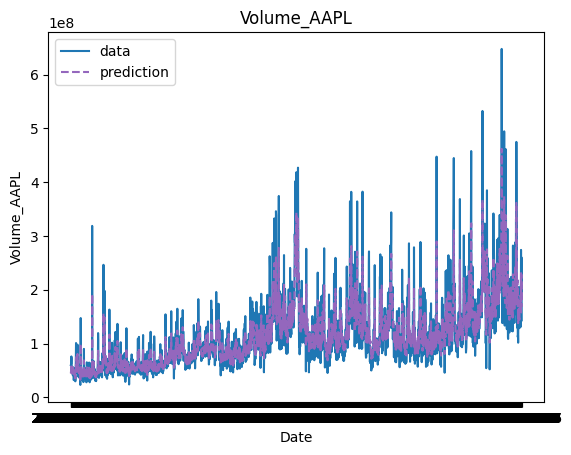

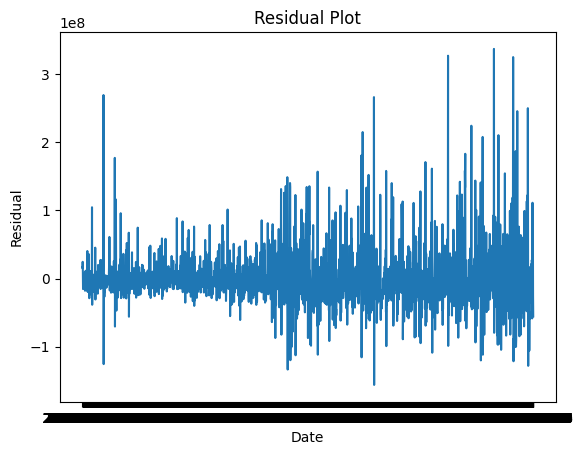

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.p

information for CPI


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                 2516
Model:                 ARIMA(2, 0, 0)   Log Likelihood                8393.586
Date:                Fri, 02 May 2025   AIC                         -16779.172
Time:                        22:10:52   BIC                         -16755.850
Sample:                             0   HQIC                        -16770.707
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        268.8560   3.63e-08   7.42e+09      0.000     268.856     268.856
ar.L1          1.9862      0.002    946.258      0.000       1.982       1.990
ar.L2         -0.9862      0.002   -469.719      0.0

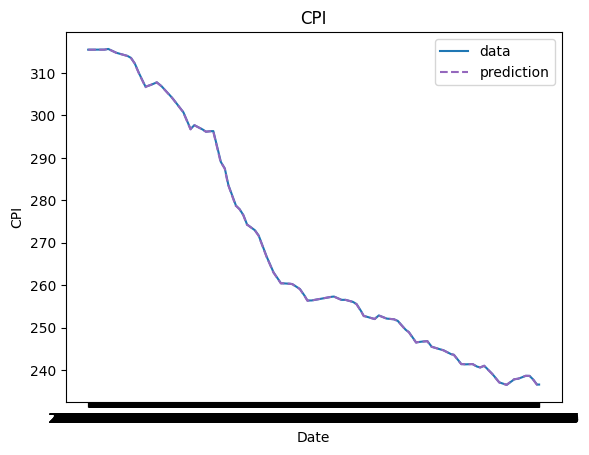

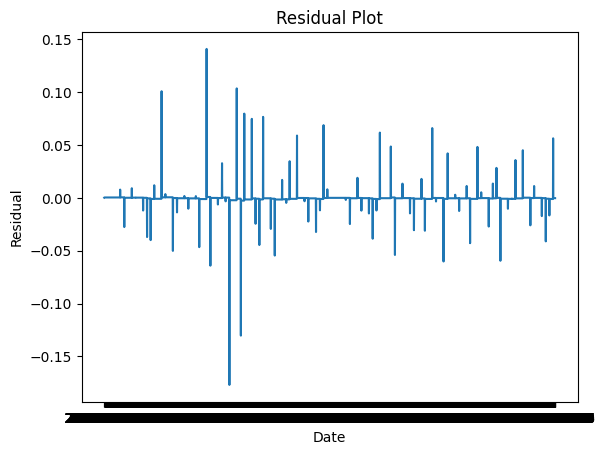

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: Conve

information for High_GOOGL


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1431: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2132: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarra

                               SARIMAX Results                                
Dep. Variable:             High_GOOGL   No. Observations:                 2516
Model:                ARIMA(11, 0, 5)   Log Likelihood                   0.000
Date:                Fri, 02 May 2025   AIC                             36.000
Time:                        23:12:21   BIC                            140.948
Sample:                             0   HQIC                            74.089
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.7057         -0       -inf      0.000      86.706      86.706
ar.L1         -3.3662    1.4e-05   -2.4e+05      0.000      -3.366      -3.366
ar.L2         -4.2655   2.91e-05  -1.46e+05      0.0

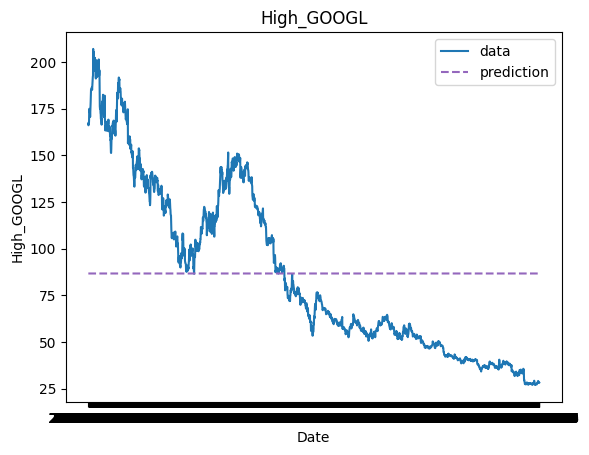

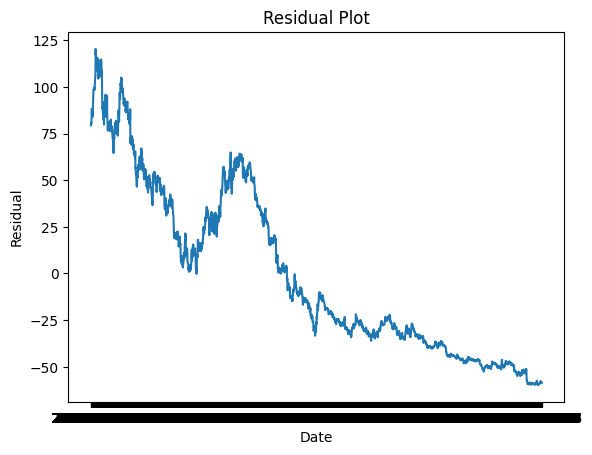

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.p

information for High_AAPL


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              High_AAPL   No. Observations:                 2516
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -5118.193
Date:                Sat, 03 May 2025   AIC                          10254.386
Time:                        00:11:04   BIC                          10306.860
Sample:                             0   HQIC                         10273.430
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.3683    548.842      0.185      0.853    -974.341    1177.078
ar.L1          0.7091      0.019     36.746      0.000       0.671       0.747
ar.L2         -0.6643      0.026    -25.585      0.0

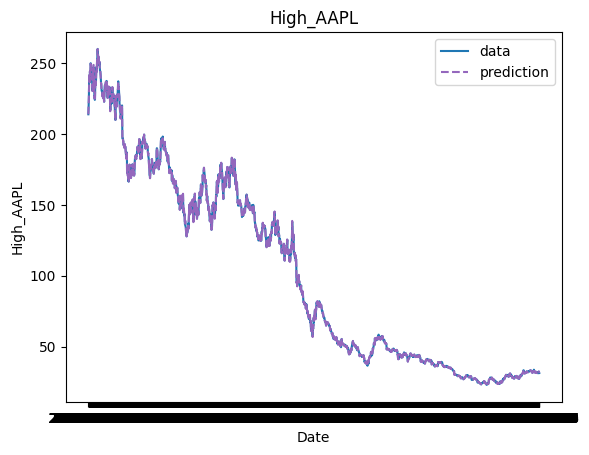

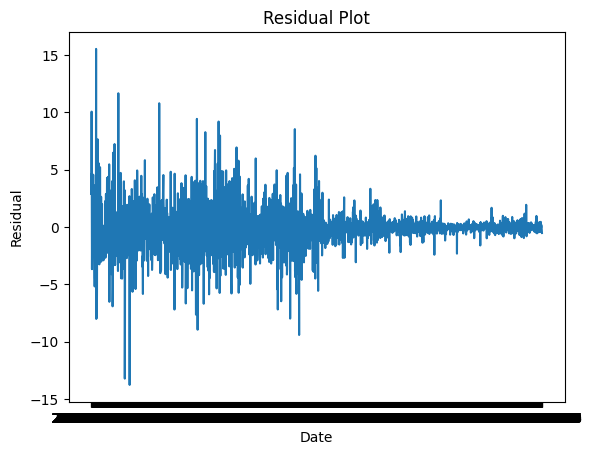

In [16]:
# testPred, testRes = getARIMAPredict(ind_NDXT)

resArray = np.zeros((len(data['Date'])+1, len(indInterestList)))
predArray = np.zeros((len(data['Date']), len(indInterestList)))


# testing
# res1 = getARIMAPredict(indInterestList[0])

for i in range(len(indInterestList)):
  result_prediction, result_residual = getARIMAPredict(indInterestList[i])
  resArray[:,i] = result_residual
  predArray[:,i] = result_prediction


In [17]:
print(resArray)
print(predArray)

[[            nan             nan             nan             nan
              nan             nan]
 [-3.29076955e+02  8.01639788e+06  1.66618462e+07  1.93111973e-04
   7.94243093e+01  2.89412908e+00]
 [ 1.45266911e+02  4.13330465e+06  1.50600961e+07  3.83565245e-04
   8.09342093e+01  4.59742730e+00]
 ...
 [-3.15991844e+01 -1.01449911e+07 -2.48892227e+07 -2.65296495e-04
  -5.86736907e+01 -4.35087666e-01]
 [ 1.01492916e+01  6.43826092e+06 -5.54438166e+07 -2.65296495e-04
  -5.85181907e+01 -5.29525122e-01]
 [            nan             nan             nan             nan
              nan             nan]]
[[9.87035128e+03 2.37398121e+07 4.47064838e+07 3.15492807e+02
  8.67056907e+01 2.13945271e+02]
 [9.56516102e+03 2.42390954e+07 4.74873739e+07 3.15492616e+02
  8.67056907e+01 2.17152573e+02]
 [9.68472439e+03 2.56137481e+07 5.16552256e+07 3.15492616e+02
  8.67056907e+01 2.22191357e+02]
 ...
 [2.40801875e+03 3.90248111e+07 2.28454143e+08 2.36599265e+02
  8.67056907e+01 3.22650877e+01]
 [2

In [18]:
headerString = 'IndexValue_NDXT, Volume_GOOGL,Volume_AAPL,CPI,High_GOOGL,High_AAPL'
np.savetxt("selectResiduals.csv", resArray, delimiter = ",", header = headerString)
np.savetxt("selectPredictions.csv", predArray, delimiter = ",", header = headerString)